In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [41]:
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)

In [42]:
Z= np.concatenate((X,Y))
df = pd.DataFrame(Z, columns=['xpt', 'ypt'])

In [43]:
df.head()

,xpt,ypt
0,0.480276,0.323892
1,0.736473,0.941507
2,0.076251,0.722039
3,0.997038,0.697886
4,0.054226,0.626673


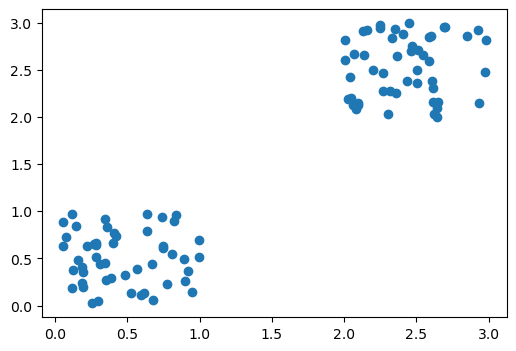

In [44]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(x=df['xpt'], y=df['ypt'])
plt.show()

In [45]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(Z)

c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mrosk\.conda\envs\ml311\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [61]:
centers = kmeans.cluster_centers_
centroids = pd.DataFrame(centers,columns=['xpt','ypt'])

In [62]:
lab = kmeans.labels_

In [63]:
df['lab']=lab

In [64]:
df.head()

,xpt,ypt,lab
0,0.480276,0.323892,0
1,0.736473,0.941507,0
2,0.076251,0.722039,0
3,0.997038,0.697886,0
4,0.054226,0.626673,0


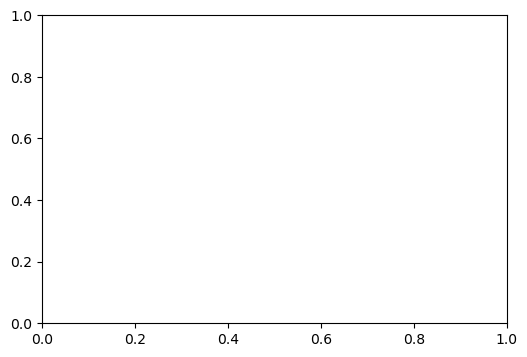

In [65]:
fig, ax = plt.subplots(figsize=(6,4))

In [66]:
ax.scatter(x=df['xpt'], y=df['ypt'], c=df['lab'])

In [67]:
ax.scatter(centroids['xpt'], centroids['ypt'])
plt.show()

In [68]:
radii = [cdist(df[lab == i].iloc[:,[0,1]], [center]).\
    max() \
        for i, center in enumerate(centers)]

In [69]:
radii

[0.6023338206285712, 0.6447382315434713]

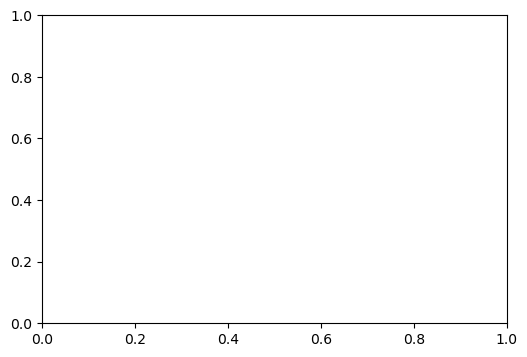

In [70]:
fig, ax = plt.subplots(figsize=(6,4))

In [71]:
ax.scatter(x=df['xpt'], y=df['ypt'], c=df['lab'])

In [72]:
ax.scatter(centroids['xpt'], centroids['ypt'])

In [73]:
ax.axis('equal')

(-0.09207108806309178,
 3.126457729661755,
 -0.12483294718539681,
 3.1435364520589735)

In [74]:
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', \
                        lw=3, alpha=0.5))

In [75]:
plt.show()